In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
tb_hotel = pd.read_csv("data/tb_hotel_aula.csv")
tb_test = pd.read_csv("data/tb_hotel_test_clean.csv")
tb_train = pd.read_csv("data/tb_hotel_train_clean.csv")

In [3]:
tb_train.head()

,lead_time,adults,children_imp,num_meal,adr,country_grp_BEL,country_grp_BRA,country_grp_CHE,country_grp_CN,country_grp_DEU,...,country_grp_FRA,country_grp_GBR,country_grp_IRL,country_grp_ITA,country_grp_NLD,country_grp_Others,country_grp_PRT,country_grp_USA,is_company,is_cancelled
0,-0.619738,0.265892,-0.261362,-0.050467,-0.582983,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,-0.085516,0.265892,-0.261362,-0.050467,-0.193021,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.507270,0.265892,-0.261362,-0.050467,-1.183915,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.554132,0.265892,-0.261362,-0.050467,-0.319759,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.701759,0.265892,-0.261362,1.856256,-0.310010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [4]:
tb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83909 entries, 0 to 83908
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lead_time           83909 non-null  float64
 1   adults              83909 non-null  float64
 2   children_imp        83909 non-null  float64
 3   num_meal            83909 non-null  float64
 4   adr                 83909 non-null  float64
 5   country_grp_BEL     83909 non-null  float64
 6   country_grp_BRA     83909 non-null  float64
 7   country_grp_CHE     83909 non-null  float64
 8   country_grp_CN      83909 non-null  float64
 9   country_grp_DEU     83909 non-null  float64
 10  country_grp_ESP     83909 non-null  float64
 11  country_grp_FRA     83909 non-null  float64
 12  country_grp_GBR     83909 non-null  float64
 13  country_grp_IRL     83909 non-null  float64
 14  country_grp_ITA     83909 non-null  float64
 15  country_grp_NLD     83909 non-null  float64
 16  coun

# Modelos de Classificação

**Introdução aos modelos de classificação supervisionada**

Modelos de classificação supervisionada são algoritmos usados para prever resultados categóricos com base em dados de entrada. Eles são comumente usados em diversos campos, como finanças, saúde e marketing.

O objetivo da classificação supervisionada é construir um modelo que possa **classificar** com precisão novas instâncias em **classes previamente definidas** com base em dados de treinamento conhecidos. Em outras palavras, o algoritmo aprende com exemplos rotulados para fazer previsões sobre novos dados não vistos.

Uma das principais características dos modelos de classificação supervisionada é a capacidade de projetar a **probabilidade** de uma instância pertencer a uma determinada classe. Essa informação pode ser muito poderosa em certas aplicações em que é importante não apenas saber a classe prevista, mas também o nível de confiança associado a essa previsão.

A **regressão logística**, que você aprenderá nesta aula, é um modelo amplamente usado para problemas de classificação binária em que a variável de resultado é 0 ou 1 (***sucesso*** ou ***fracasso***). Ele funciona estimando a probabilidade do resultado binário dadas as características de entrada e fazendo uma previsão com base nesta probabilidade.

Em resumo, modelos de classificação supervisionada são ferramentas poderosas para **prever resultados categóricos** e ajudar na tomada de decisões informadas em uma variedade de campos. Ao projetarem a **probabilidade** de uma classe, esses modelos fornecem informações adicionais que podem ser usadas para melhorar ainda mais os processos de tomada de decisão.

**Principais características dos modelos de classificação supervisionada:**

- Classificação precisa de novas instâncias em classes previamente definidas com base em dados de treinamento conhecidos.
- Projeção da probabilidade de uma instância pertencer a uma determinada classe.
- Potencial para fornecer informações adicionais para melhorar os processos de tomada de decisão.

## Estimando Probabilidades Condicionais

Vamos começar analisando como podemos avaliar a probabilidade de cancelamentos de reserva utilizando estatística descritiva:

In [7]:
tb_hotel.groupby("meal")["is_cancelled"].sum()

meal
BB           34510
FB             478
HB            4984
SC            3966
Undefined      286
Name: is_cancelled, dtype: int64

In [8]:
tb_hotel.groupby("meal")["is_cancelled"].count()

meal
BB           92310
FB             798
HB           14463
SC           10650
Undefined     1169
Name: is_cancelled, dtype: int64

In [9]:
34/92

0.3695652173913043

In [6]:
tb_hotel["is_cancelled"].mean()

0.37041628277075134

In [11]:
tb_hotel.groupby("lead_time")["is_cancelled"].agg(['mean', 'count'])

,mean,count
lead_time,,
0,0.067770,6345
1,0.092775,3460
2,0.102948,2069
3,0.100220,1816
4,0.102624,1715
...,...,...
622,1.000000,17
626,1.000000,30
629,1.000000,17


Podemos comparar as diferentes taxas de cancelamento facilmente com **outras variáveis categóricas** usando a função `groupby` do Pandas. Mas e se quisermos comparar as taxas de cancelamento com **variáveis numéricas**?

In [12]:
tb_hotel["grp_lead_time"] = pd.qcut(tb_hotel["lead_time"], 4)

In [14]:
tb_hotel.groupby("grp_lead_time")["is_cancelled"].agg(['mean', 'count'])

,mean,count
grp_lead_time,,
"(-0.001, 18.0]",0.146365,30260
"(18.0, 69.0]",0.358649,29639
"(69.0, 160.0]",0.425764,29669
"(160.0, 737.0]",0.554389,29822


o problema dessa abordagem é a sensibilidade às quantidades de observações em cada grupo. Por exemplo, se tivermos apenas uma observação em um grupo, a taxa de cancelamento será 100% ou 0%, dependendo do resultado dessa única observação. Logo, se tentarmos criar muitos grupos, podemos acabar com grupos com poucas observações, o que pode levar a estimativas imprecisas.

In [15]:
tb_hotel.groupby("grp_lead_time")["is_cancelled"].mean().reset_index()

,grp_lead_time,is_cancelled
0,"(-0.001, 18.0]",0.146365
1,"(18.0, 69.0]",0.358649
2,"(69.0, 160.0]",0.425764
3,"(160.0, 737.0]",0.554389


<Axes: xlabel='grp_lead_time', ylabel='is_cancelled'>

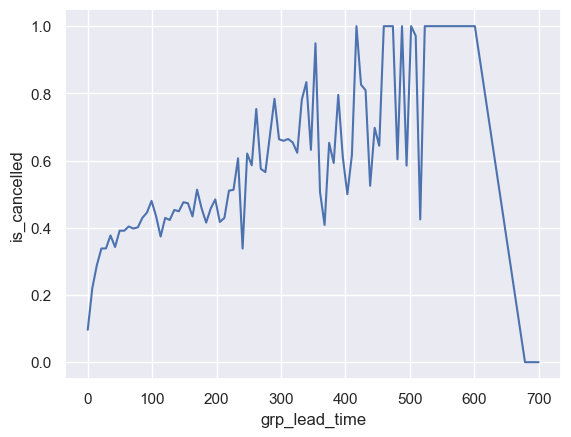

In [16]:
tb_hotel["grp_lead_time"] = pd.cut(tb_hotel["lead_time"], 100, labels = np.linspace(0, 700, 100))
sns.lineplot(
    data=tb_hotel.groupby("grp_lead_time")["is_cancelled"].mean().reset_index(),
    x="grp_lead_time",
    y="is_cancelled",
)

In [17]:
tb_hotel.groupby("grp_lead_time")["is_cancelled"].agg(["count", "mean"]).reset_index()

,grp_lead_time,count,mean
0,0.000000,19746,0.096323
1,7.070707,7026,0.220040
2,14.141414,6462,0.288765
3,21.212121,4813,0.338251
4,28.282828,4823,0.338586
...,...,...,...
95,671.717172,0,NaN
96,678.787879,1,0.000000
97,685.858586,0,NaN
98,692.929293,0,NaN


## Regressão Logística Simples

A regressão logística é um modelo estatístico usado para prever a probabilidade de um evento binário ocorrer, ou seja, quando a variável dependente tem apenas dois possíveis valores: 0 ou 1. Exemplos comuns disso incluem "sim" ou "não", "verdadeiro" ou "falso", ou "aprovado" ou "reprovado" e "pago" ou "não pago".

O modelo de regressão logística funciona através da relação entre uma variável dependente binária e uma ou mais variáveis independentes (também conhecidas como *features*). A análise é baseada na estimativa das probabilidades de cada valor da variável resposta ocorrer em função dos valores das variáveis independentes.

A regressão logística é chamada "logística" porque usa a função logística ou sigmoidal para modelar a probabilidade de um determinado resultado. Essa função tem uma forma de "S" especial e é usada para transformar qualquer valor linear em uma linha sigmóide que varia de 0 a 1.

As aplicações da regressão logística são diversas e incluem áreas como marketing, finanças, medicina e ciências sociais. Este modelo é particularmente útil para prever resultados binários em cenários em que a interpretação da probabilidade da ocorrência do evento é importante.

Ao entender os conceitos básicos da regressão logística, você terá uma compreensão mais profunda sobre como os modelos estatísticos são usados para fazer previsões precisas em diversas áreas.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X_train = tb_train[["lead_time"]] # Declarando Matriz de Features
y_train = tb_train["is_cancelled"] # Declarando Variável Resposta

m1 = LogisticRegression()
m1.fit(X_train, y_train)

LogisticRegression()

### Visualizando as probabilidades estimadas

O método `predict_proba()` da classe LogisticRegression da biblioteca scikit-learn é usado para retornar as probabilidades estimadas por classe. Quando queremos fazer previsões de classes em um modelo de regressão logística, ao utilizarmos o método `predict()` teremos a classe prevista (0 ou 1).

No entanto, também é possível utilizar o método `predict_proba()`, que fornece a probabilidade estimada do dado pertencer à classe 0 e à classe 1, respectivamente. Este método retorna uma matriz de forma `(n_samples, 2)`, onde `n_samples` é o número de amostras a serem previstas, sendo que cada linha da matriz corresponde a uma amostra e as duas colunas correspondem às probabilidades da amostra pertencer à classe 0 e classe 1, respectivamente.

Por exemplo, se usarmos o método `predict_proba()` em uma amostra e ele retornar `[0.2, 0.8]`, isso significa que a probabilidade estimada dessa amostra pertencer à classe 0 é de 20% e pertencer à classe 1 é de 80%.

Esse método é útil quando queremos ter uma ideia mais precisa das probabilidades de uma determinada amostra pertencer a cada classe, especialmente em cenários com ambiguidade nas classificações. Porém, é importante lembrar que a escolha da classe final ainda se dá através da aplicação de um limiar (threshold) para a probabilidade estimada.

In [21]:
m1.predict_proba(X_train)

array([[0.72657196, 0.27342804],
       [0.64719999, 0.35280001],
       [0.71080349, 0.28919651],
       ...,
       [0.52165913, 0.47834087],
       [0.46484885, 0.53515115],
       [0.77282449, 0.22717551]])

Como em nosso dataset as reservas canceladas são representadas pela classe 1, podemos utilizar o método `predict_proba()` para visualizar as probabilidades estimadas de cancelamento para cada reserva:

In [27]:
m1.predict_proba(X_train)[:, 1]

array([0.27342804, 0.35280001, 0.28919651, ..., 0.47834087, 0.53515115,
       0.22717551])

In [28]:
tb_train["pred_prob_m1"] = m1.predict_proba(X_train)[:, 1]
tb_train.head()

,lead_time,adults,children_imp,num_meal,adr,country_grp_BEL,country_grp_BRA,country_grp_CHE,country_grp_CN,country_grp_DEU,...,country_grp_GBR,country_grp_IRL,country_grp_ITA,country_grp_NLD,country_grp_Others,country_grp_PRT,country_grp_USA,is_company,is_cancelled,pred_prob_m1
0,-0.619738,0.265892,-0.261362,-0.050467,-0.582983,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.273428
1,-0.085516,0.265892,-0.261362,-0.050467,-0.193021,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.352800
2,-0.507270,0.265892,-0.261362,-0.050467,-1.183915,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.289197
3,-0.554132,0.265892,-0.261362,-0.050467,-0.319759,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.282561
4,0.701759,0.265892,-0.261362,1.856256,-0.310010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.484833


In [32]:
tb_hotel.head()

,is_cancelled,lead_time,country,company,children,adults,meal,adr,reservation_status_date,booking_changes,grp_lead_time
0,0,342,PRT,NaN,0.0,2,BB,0.0,2015-07-01,3,325.252525
1,0,737,PRT,NaN,0.0,2,BB,0.0,2015-07-01,4,700.000000
2,0,7,GBR,NaN,0.0,1,BB,75.0,2015-07-02,0,0.000000
3,0,13,GBR,NaN,0.0,1,BB,75.0,2015-07-02,0,7.070707
4,0,14,GBR,NaN,0.0,2,BB,98.0,2015-07-03,0,7.070707


In [31]:
104 + 2 * 106

316

<Axes: xlabel='lead_time', ylabel='pred_prob_m1'>

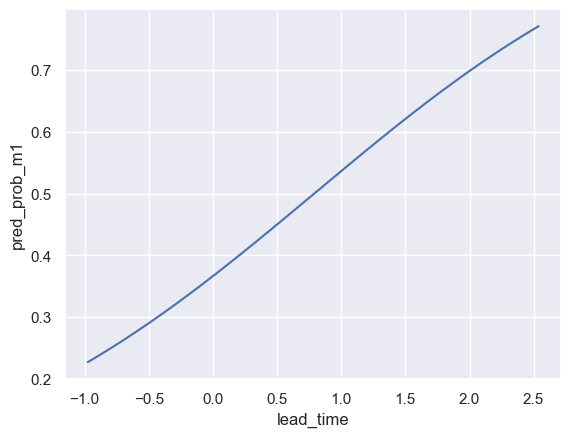

In [29]:
sns.lineplot(data=tb_train, x="lead_time", y="pred_prob_m1")

## Aumentando o # de Variáveis

Quando queremos adicionar mais de uma variável em um modelo de regressão logística, chamamos isso de regressão logística múltipla ou regressão logística com múltiplas variáveis. A ideia básica é a mesma da regressão simples, mas incluímos várias variáveis independentes no modelo.

Para construir o modelo de regressão logística múltipla na biblioteca `sklearn`, basta passar as variáveis independentes como uma matriz bidimensional para o método `.fit()`.

In [33]:
X_train = tb_train[["lead_time", "adults"]]
y_train = tb_train["is_cancelled"]
m2 = LogisticRegression()
m2.fit(X_train, y_train)

LogisticRegression()

In [34]:
tb_train["pred_prob_m2"] = m2.predict_proba(X_train)[:, 1]

<Axes: xlabel='lead_time', ylabel='pred_prob_m2'>

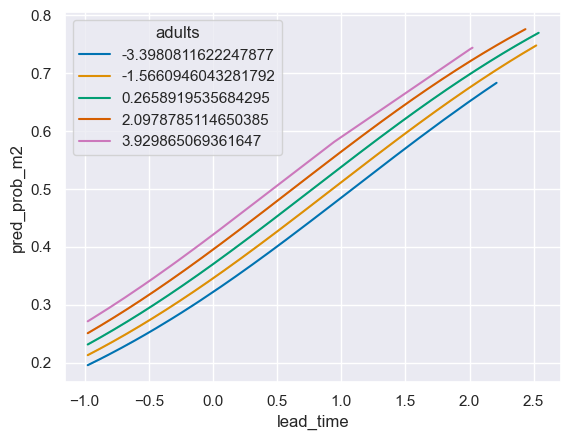

In [35]:
sns.lineplot(
    data=tb_train, x="lead_time", y="pred_prob_m2", hue="adults", palette="colorblind"
)

#### Visualizando através de Simulações

Para visualizar os **efeitos marginais** de cada variável em uma regressão logística já estimada, podemos usar simulações para gerar previsões com base em diferentes valores das variáveis independentes. Isso nos permitirá entender o efeito de cada variável na probabilidade de um resultado positivo (ou seja, a classe prevista). 

Aqui está um exemplo de como poderíamos fazer isso:

1. Escolha uma ou mais variáveis independentes que você deseja examinar.

2. Para cada variável independente escolhida, defina uma faixa de valores para simular. Por exemplo, se a variável é "idade", podemos escolher uma faixa de 18 a 80 anos.

3. Use a função `predict_proba()` do modelo já ajustado para prever as probabilidades de resultado positivo para cada valor simulado da variável.

4. Plote os resultados. Isso pode ser feito usando uma biblioteca de visualização, como matplotlib ou seaborn. Você pode, por exemplo, plotar o valor simulado da variável na horizontal e a probabilidade de resultado positivo na vertical.

5. Repita o processo para todas as variáveis que você deseja examinar.

Este tipo de visualização pode ajudar a entender como cada variável afeta a probabilidade de um resultado positivo em uma regressão logística. Ao explorar diferentes valores da variável, podemos ver como o efeito marginal muda conforme a variável aumenta ou diminui. Isso pode nos ajudar a identificar quais variáveis são mais importantes para prever o resultado e como mudanças nessas variáveis podem afetar nossas previsões.

Vamos criar uma nova tabela de dados com **dados sintéticos** das variáveis `lead_time` e `adults`:

In [44]:
adults_simul = list(np.linspace(tb_train["adults"].min(), 4, 100))
lead_time_simul = [0] * 100
tb_simul_adults = pd.DataFrame({"lead_time": lead_time_simul, "adults": adults_simul})
tb_simul_adults

,lead_time,adults
0,0,-3.398081
1,0,-3.323353
2,0,-3.248625
3,0,-3.173897
4,0,-3.099169
...,...,...
95,0,3.701088
96,0,3.775816
97,0,3.850544
98,0,3.925272


Agora, vamos utilizar o método `.predict_proba()` para estimar as probabilidades de cancelamento para cada valor simulado da variável `adults`, como `lead_time` fixo:

In [45]:
tb_simul_adults["prob_cancelled"] = m2.predict_proba(
    tb_simul_adults[["lead_time", "adults"]]
)[:, 1]

In [46]:
tb_simul_adults

,lead_time,adults,prob_cancelled
0,0,-3.398081,0.321920
1,0,-3.323353,0.322870
2,0,-3.248625,0.323822
3,0,-3.173897,0.324775
4,0,-3.099169,0.325729
...,...,...,...
95,0,3.701088,0.417793
96,0,3.775816,0.418851
97,0,3.850544,0.419910
98,0,3.925272,0.420970


Esse é o **efeito marginal** da variável `adults`:

<Axes: xlabel='adults', ylabel='prob_cancelled'>

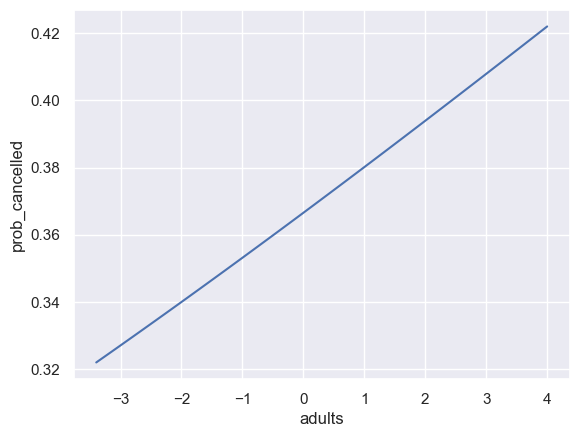

In [47]:
sns.lineplot(data=tb_simul_adults, x="adults", y="prob_cancelled")

Agora vamos fazer o mesmo para a variável `lead_time`, com `adults` fixo:

In [49]:
lead_time_simul = list(np.linspace(tb_train["lead_time"].min(), 4, 100))
adults_simul = [0] * 100
tb_simul_lead_time = pd.DataFrame(
    {"lead_time": lead_time_simul, "adults": adults_simul}
)
tb_simul_lead_time

,lead_time,adults
0,-0.975886,0
1,-0.925625,0
2,-0.875363,0
3,-0.825102,0
4,-0.774840,0
...,...,...
95,3.798954,0
96,3.849216,0
97,3.899477,0
98,3.949739,0


In [50]:
tb_simul_lead_time["prob_cancelled"] = m2.predict_proba(
    tb_simul_lead_time[["lead_time", "adults"]]
)[:, 1]

(0.0, 1.0)

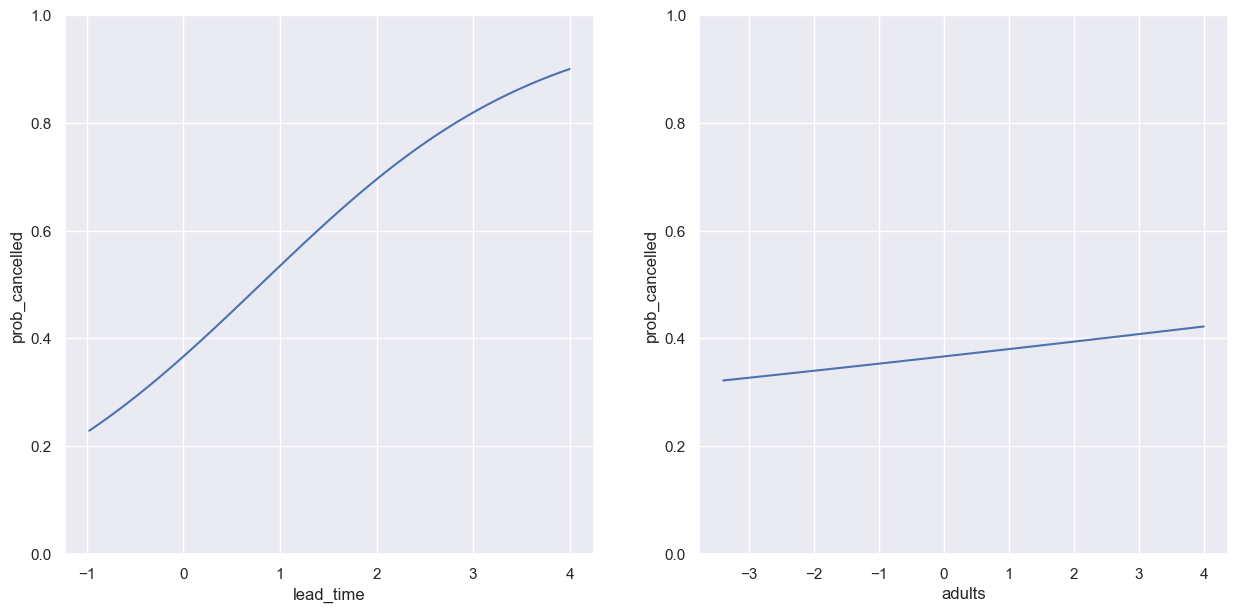

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.lineplot(data=tb_simul_lead_time, x="lead_time", y="prob_cancelled", ax=ax[0])
sns.lineplot(data=tb_simul_adults, x="adults", y="prob_cancelled", ax=ax[1])
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)

Agora, vamos avaliar o efeito de ambas as variáveis entre `-1` e `+1` desvio padrão:

In [55]:
lead_time_simul = list(np.linspace(-1, 1, 100)) * 5
adults_simul = [-1] * 100 + [-0.5] * 100 + [0] * 100 + [0.5] * 100 + [1] * 100
tb_simul = pd.DataFrame({"lead_time": lead_time_simul, "adults": adults_simul})
tb_simul

,lead_time,adults
0,-1.000000,-1.0
1,-0.979798,-1.0
2,-0.959596,-1.0
3,-0.939394,-1.0
4,-0.919192,-1.0
...,...,...
495,0.919192,1.0
496,0.939394,1.0
497,0.959596,1.0
498,0.979798,1.0


In [57]:
tb_simul["prob_cancelled"] = m2.predict_proba(tb_simul[["lead_time", "adults"]])[:, 1]

<Axes: xlabel='lead_time', ylabel='prob_cancelled'>

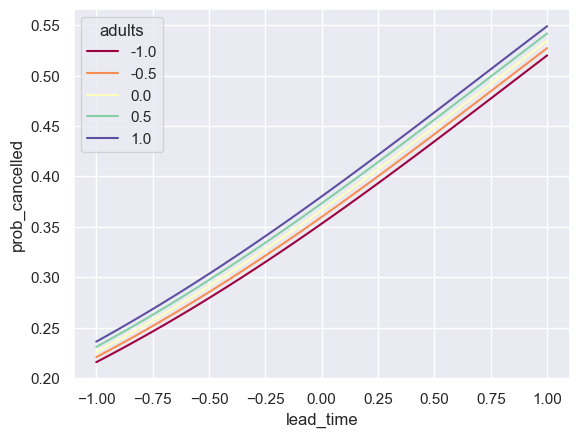

In [58]:
sns.lineplot(
    data=tb_simul, x="lead_time", y="prob_cancelled", hue="adults", palette="Spectral"
)

## *Thresholding* para Classificação

**Thresholding** é o processo de selecionar um valor limite (*threshold*) para converter uma saída contínua em uma saída discreta, como "positivo" ou "negativo". Na regressão logística, a função sigmóide usada para prever as probabilidades de pertencer a uma determinada classe pode produzir valores contínuos entre 0 e 1.

Para transformar essas probabilidades contínuas em classes discretas, podemos escolher um *threshold* e compará-lo com a probabilidade prevista. 

- Se a probabilidade prevista for maior do que o *threshold*, atribuímos a observação à classe positiva.
- Caso contrário, atribuímos a observação à classe negativa.

Por exemplo, se escolhermos um *threshold* de 0,5, todas as observações com uma probabilidade prevista maior do que 0,5 serão rotuladas como positivas, enquanto aquelas com uma probabilidade menor do que 0,5 serão rotuladas como negativas. No entanto, a escolha do *threshold* não precisa ser fixa em 0,5 e pode variar dependendo dos requisitos da tarefa e do custo de classificar erroneamente alguns pontos.

Podemos usar a função `predict()` do modelo ajustado para gerar previsões de classe usando um determinado *threshold*. A sintaxe geral seria `model.predict(X_test)`, onde `X_test` é uma matriz de dados de teste com as mesmas características das observações utilizadas para treinar o modelo. A função de decisão que foi aprendida durante o treinamento será aplicada a cada observação em `X_test` e a saída será convertida em uma classe com base no *threshold* de 0,5 (por padrão, o método `.predict()` preve a classe mais provável).

Em resumo, para usar o *thresholding* da função de decisão (probabilidade) para prever as classes de nossas observações, escolhemos um *threshold* e comparamos a probabilidade prevista para cada observação com esse limite. Se a probabilidade prevista for maior do que o *threshold*, a observação é rotulada como pertencente à classe positiva, caso contrário, é rotulada como pertencente à classe negativa.

In [61]:
m1.predict(tb_train[["lead_time"]])

array([0, 0, 0, ..., 0, 1, 0])

In [59]:
tb_train["pred_canc_m1"] = m1.predict(tb_train[["lead_time"]])
tb_train[["is_cancelled", "pred_canc_m1"]]

,is_cancelled,pred_canc_m1
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
83904,0,0
83905,0,1
83906,1,0
83907,1,1


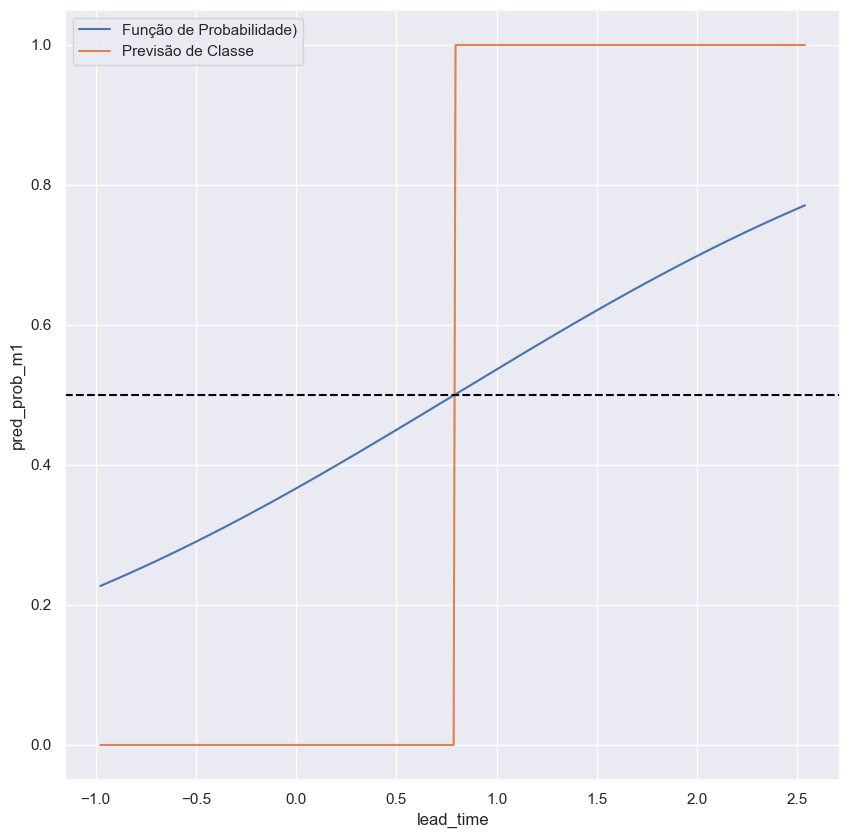

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.lineplot(data=tb_train, x="lead_time", y="pred_prob_m1", label = "Função de Probabilidade)")
sns.lineplot(data=tb_train, x="lead_time", y="pred_canc_m1", label = "Previsão de Classe")
ax.axhline(0.5, ls="--", color="black")

## Modelo Completo

Agora, vamos adicionar todas as variáves que criamos na última aula ao nosso modelo:

In [64]:
X_train = tb_train.drop(
    ["is_cancelled", "pred_prob_m1", "pred_prob_m2", "pred_canc_m1"], axis=1
)
y_train = tb_train["is_cancelled"]
X_test = tb_test.drop("is_cancelled", axis=1)
y_test = tb_test["is_cancelled"]

In [65]:
X_train

,lead_time,adults,children_imp,num_meal,adr,country_grp_BEL,country_grp_BRA,country_grp_CHE,country_grp_CN,country_grp_DEU,country_grp_ESP,country_grp_FRA,country_grp_GBR,country_grp_IRL,country_grp_ITA,country_grp_NLD,country_grp_Others,country_grp_PRT,country_grp_USA,is_company
0,-0.619738,0.265892,-0.261362,-0.050467,-0.582983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.085516,0.265892,-0.261362,-0.050467,-0.193021,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.507270,0.265892,-0.261362,-0.050467,-1.183915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.554132,0.265892,-0.261362,-0.050467,-0.319759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.701759,0.265892,-0.261362,1.856256,-0.310010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83904,-0.685344,-1.566095,-0.261362,-0.050467,0.898872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
83905,1.057907,0.265892,4.730715,-0.050467,1.470167,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83906,0.664270,0.265892,4.730715,-0.050467,1.698295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
83907,0.992301,0.265892,-0.261362,-0.050467,0.547907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
m3 = LogisticRegression()
m3.fit(X_train, y_train)

LogisticRegression()

### Utilizando valores SHAP para explicar as previsões

O **SHAP** (*SHapley Additive exPlanations*) é uma técnica de interpretação que pode ser utilizada para explicar a relação entre as variáveis independentes e dependentes em um modelo de aprendizado de máquina.

A ideia central do SHAP é calcular, para cada observação do conjunto de dados, o impacto marginal que cada variável tem na predição do modelo. O cálculo do impacto marginal é baseado na teoria dos jogos, mais especificamente no conceito de valor de Shapley, que é um método para distribuir equitativamente os ganhos obtidos em jogos cooperativos entre seus participantes.

Dessa forma, podemos entender como cada variável contribui para a predição do modelo para uma determinada observação. Com isso, o SHAP nos permite analisar a importância relativa das diferentes variáveis para a variável resposta em questão.

Uma maneira comum de visualizar as saídas do SHAP é através de um gráfico chamado de *summary plot*. Este gráfico apresenta uma barra horizontal para cada variável independente, ordenadas de acordo com a sua importância para a predição da variável resposta. Em seguida, para cada observação do conjunto de dados, uma seta vertical é traçada a partir da barra correspondente à média da variável e se estende até a posição onde se encontra a contribuição daquela variável para a predição da variável resposta em questão.

Com essa informação, podemos entender como as diferentes variáveis independentes interagem para produzir a variável resposta em um determinado ponto no conjunto de dados, bem como avaliar a sensibilidade do modelo a mudanças nas diferentes variáveis.

Em resumo, o **SHAP** é uma ferramenta poderosa para ajudar a explicar as relações entre variáveis independentes e dependentes em modelos de aprendizado de máquina, permitindo-nos interpretar de forma mais precisa como o modelo está fazendo suas predições.

In [67]:
import shap

In [68]:
explainer = shap.explainers.Linear(m3, X_train)
shap_values = explainer(X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


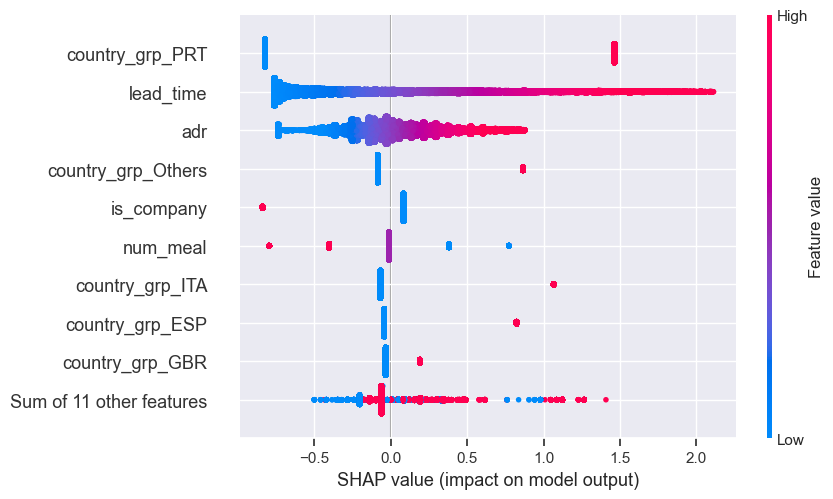

In [69]:
shap.plots.beeswarm(shap_values)